In [1]:
import numpy as np
from tqdm import tqdm
from glob import glob
from utils import data as ud
from utils import analysis as ua
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def show_arpes(arpes):
    data = arpes['data']
    ax0 = arpes['ax0']
    ax1 = arpes['ax1']
    
    # TODO Is this a forever-constant?
    ax0 = 16.89 - ax0
    extent = [ax1[0], ax1[-1], ax0[-1], ax0[0]]
    
    plt.imshow(data, extent = extent, aspect = 'auto')

(0, 1)

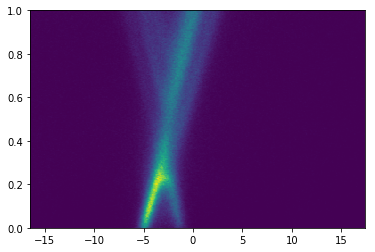

In [6]:
path = 'data/I=55/1350a.txt'
arpes = ud.read_arpes(path)
show_arpes(arpes)
plt.ylim([0, 1])

In [7]:
Ekins = arpes['ax0']
Eb = 16.89 - arpes['ax0']

# Select the range
Eb_min = 0.25
Eb_max = 0.6
ids = (Eb > Eb_min) & (Eb < Eb_max)
ids = np.where(ids)[0]

100%|██████████| 69/69 [00:02<00:00, 17.01it/s]


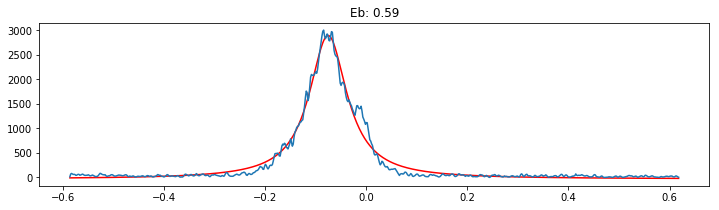

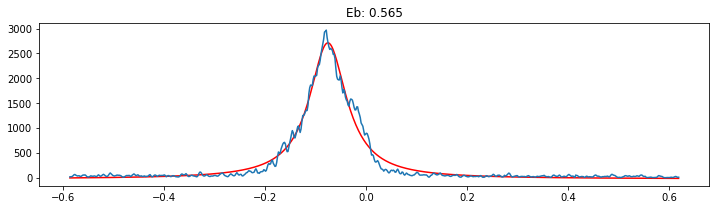

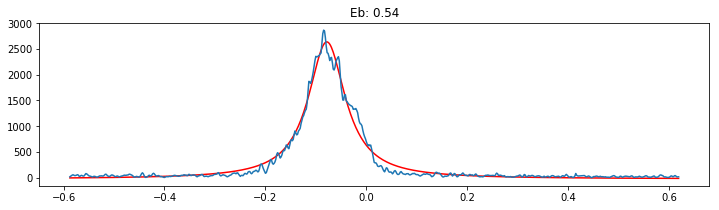

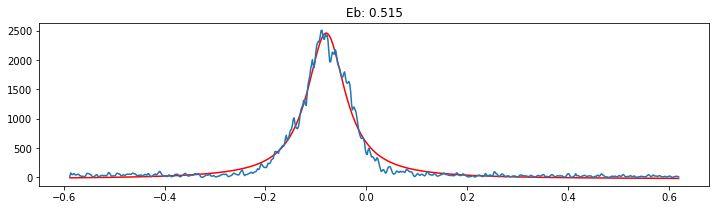

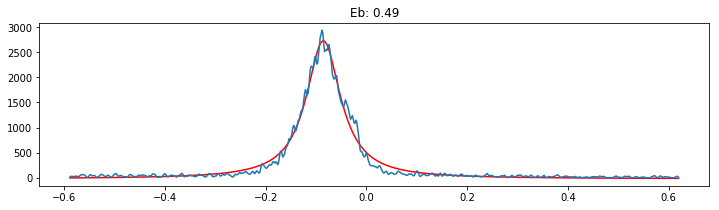

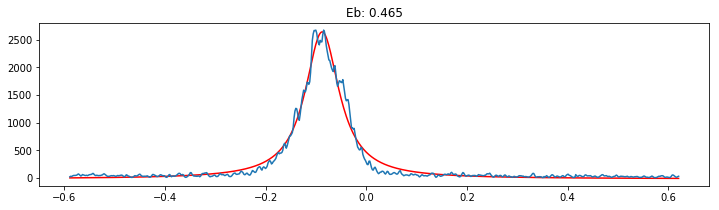

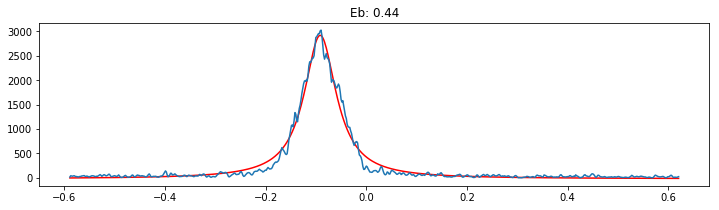

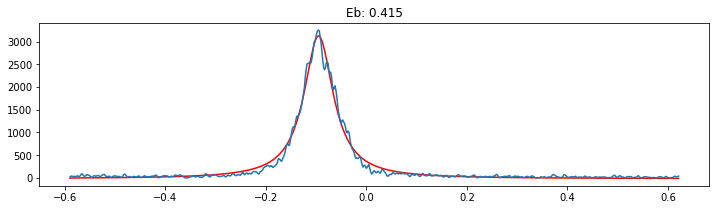

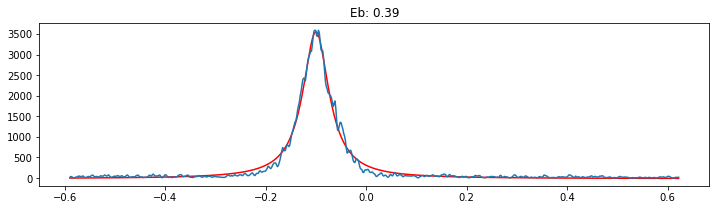

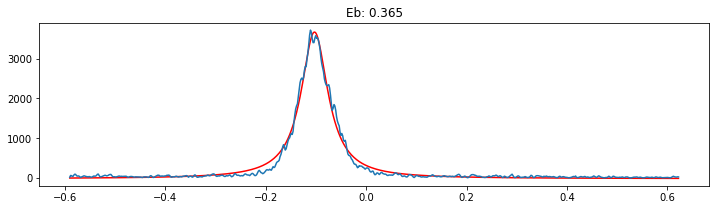

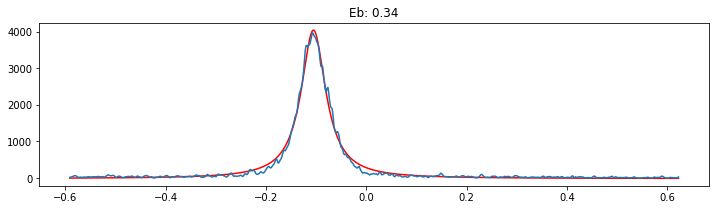

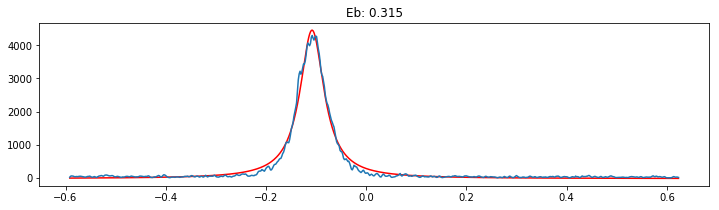

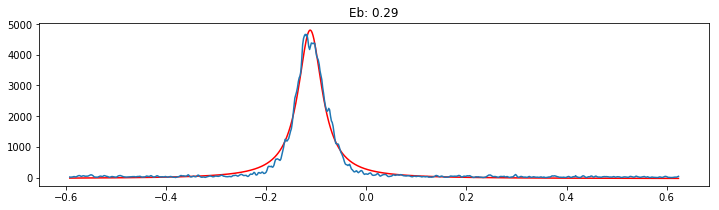

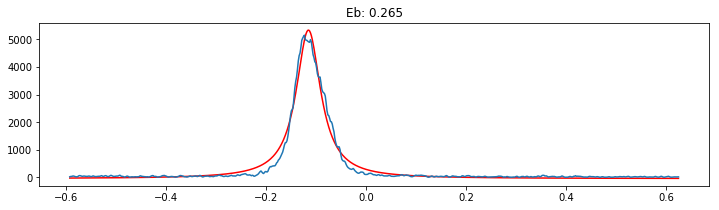

In [8]:
scores = []
costs = []
for it in tqdm(ids):
    k, score = ua.fit_function(arpes, it)
    scores.append(score)
    costs.append(score.cost)
    # if score.cost > 3e7: continue
    if it % 5 == 0:
        plt.figure(figsize = [12, 3])
        plt.title('Eb: {}'.format(Eb[it]))
        plt.plot(k, ua.lorentzian(k, score.x), c='r')
        plt.plot(k, arpes['data'][it][:-1])

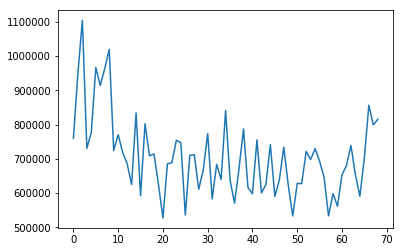

In [6]:
plt.plot(costs)

In [7]:
w1 = []
cost = []
for score in scores:
    w1.append(score.x[2])
    cost.append(score.cost)

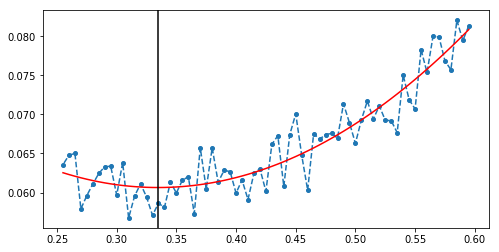

Parabola minimum: 0.334647620811, 0.0606446246703


In [8]:
plt.figure(figsize = [8, 4])
plt.plot(Eb[ids], w1, '--o', ms = 4)

z = np.polyfit(Eb[ids], w1, 2)
p = np.poly1d(z)
plt.plot(Eb[ids], p(Eb[ids]), c='r')

# -b/2a
x_min = -z[1]/(2*z[0])
plt.axvline(x = x_min, c = 'k')
plt.show()

print 'Parabola minimum: {}, {}'.format(x_min, p(x_min))

### See bad fits

In [9]:
w1 = np.array(w1)
bad_ids = np.where(w1 < 0)[0]

In [10]:
for it in bad_ids:
    score = scores[it]
    print score.cost
    plt.plot(k, ua.lorentzian(k, score.x), c='r')
    plt.plot(k, arpes['data'][it][:-1])
    plt.show()

Text(0.5,1,u'residuals')

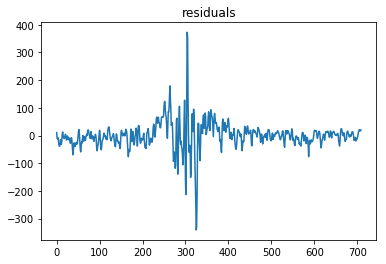

In [11]:
plt.plot(score.fun)
plt.title('residuals')

In [12]:
path

'data/I=55/1225b.txt'

In [13]:
score.x

array([  2.04544550e+01,   1.80091737e+02,   6.35741748e-02,
        -7.94106467e-02])

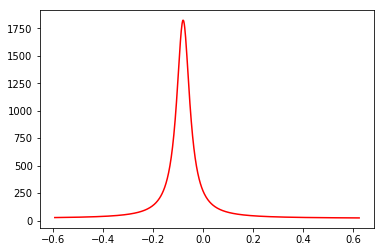

In [14]:
plt.plot(k, ua.lorentzian(k, score.x), c='r')

In [15]:
print score.x[1]

180.091736732
